In [ ]:
#Mini projet 5 : Machine learning

#Dans ce derniers exercices nous allons faire un traitement des données du fichier dirty_diabetes_data.csv 
# afin qu’elles soient compatibles avec un algorithme de type DecisionTreeClassifier. 
# Cet algorithme devra prédire si un individu est diabétique ou non.
# La partie propre au machine learning vous sera fourni dans le fichier ML_diabete.py pour
# votre culture générale et afin de voir le résultat concret de votre travail.

In [ ]:
#Appropriation des données :
#Ouvrir le fichier avec pandas et prenez connaissance des données avec les fonctions classiques 
# de résumé d’information d’un dataset
#Affichez le nombre de valeur nulle par colonne 
#Afficher si les 10 premières colonnes sont des valeurs dupliquées dans le set de données
#Afficher un bloxplot avec les colonnes du set de données. Cela vous indiquera si vos données
# suivent une répartition normale ou non (ici ce n’est pas le cas)


In [306]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [307]:
data_brut = pd.read_csv("dirty_diabetes_data.csv", sep = ";")
data_brut.head(10)

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome
0,Male,A,6,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,Male,A,1,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,Female,B,8,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,Male,A,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,Male,AB,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
5,Female,A,5,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0
6,Male,B,3,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1
7,Male,B,10,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0
8,Male,O,2,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1
9,Female,O,8,125.0,96.0,0.0,0.0,0.0,0.232,54.0,1


In [308]:
data_brut.shape

(768, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       760 non-null    object 
 1   blood_type   747 non-null    object 
 2   pregnancies  768 non-null    int64  
 3   glucose      764 non-null    float64
 4   diastolic    766 non-null    float64
 5   triceps      767 non-null    float64
 6   insulin      767 non-null    float64
 7   bmi          768 non-null    float64
 8   dpf          767 non-null    float64
 9   age          766 non-null    float64
 10  Outcome      768 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 66.1+ KB


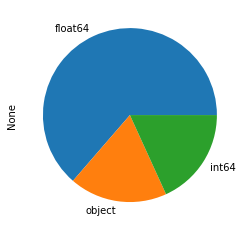

In [309]:
#type de colonnes

data_brut.dtypes.value_counts().plot.pie();

data_brut.info()

In [310]:
#resumé stats
data_brut.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome
count,768.000000,764.000000,766.000000,767.000000,767.000000,768.000000,767.000000,766.000000,768.000000
mean,3.845052,120.828534,69.090078,20.521512,79.903520,33.259505,0.472017,33.262402,0.348958
std,3.369578,32.264969,19.377056,15.957245,115.283105,25.134386,0.331522,11.768033,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,-35.900000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.275000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,476.000000,2.420000,81.000000,1.000000


In [311]:
#comptage des nul
percent_missing_df = data_brut.isnull().sum() * 100 / len(data_brut)
print(percent_missing_df)

gender         1.041667
blood_type     2.734375
pregnancies    0.000000
glucose        0.520833
diastolic      0.260417
triceps        0.130208
insulin        0.130208
bmi            0.000000
dpf            0.130208
age            0.260417
Outcome        0.000000
dtype: float64


In [312]:
#comptage des nul
data_brut.isna().value_counts()

gender  blood_type  pregnancies  glucose  diastolic  triceps  insulin  bmi    dpf    age    Outcome
False   False       False        False    False      False    False    False  False  False  False      730
        True        False        False    False      False    False    False  False  False  False       19
True    False       False        False    False      False    False    False  False  False  False        8
False   False       False        True     False      False    False    False  False  False  False        3
                                 False    False      False    False    False  False  True   False        2
                                          True       False    False    False  False  False  False        2
                                          False      False    True     False  False  False  False        1
                                                     True     False    False  False  False  False        1
        True        False        False    Fa

In [313]:
#dropna
data_brut = data_brut.dropna()

In [314]:
data_brut.shape
#38 lignes supprimées

(730, 11)

In [315]:
#Afficher si les 10 premières colonnes sont des valeurs dupliquées dans le set de données

#find duplicate rows across all columns
duplicateRows = data_brut[data_brut.duplicated()]
duplicateRows.head()

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome


In [316]:
#on vérifie
data_brut.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
746    False
747    False
748    False
749    False
750    False
Length: 730, dtype: bool

In [317]:
# à priori, pas de duplicatas dans le jeu de données

<AxesSubplot:>

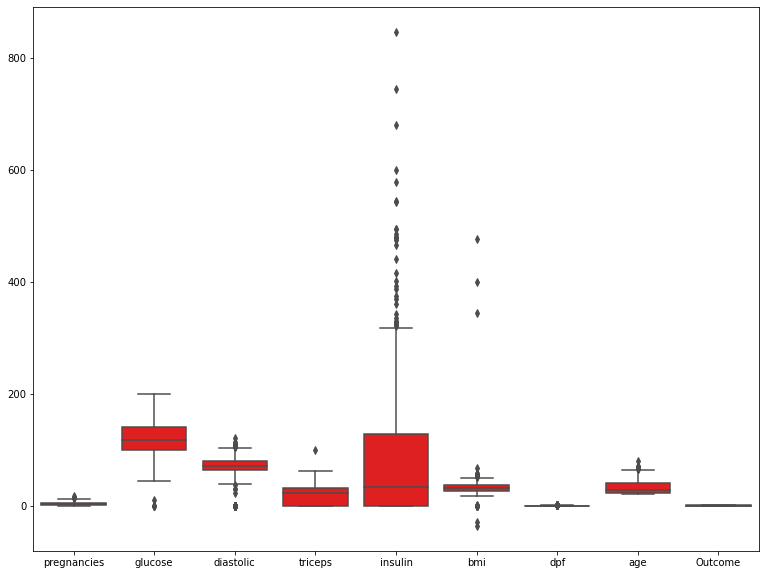

In [318]:
#Afficher un bloxplot avec les colonnes du set de données. Cela vous indiquera si vos données
plt.figure(figsize = (13,10))
sns.boxplot(data=data_brut, color="red")

In [319]:
#il y a des outliers...

<AxesSubplot:xlabel='pregnancies', ylabel='Count'>

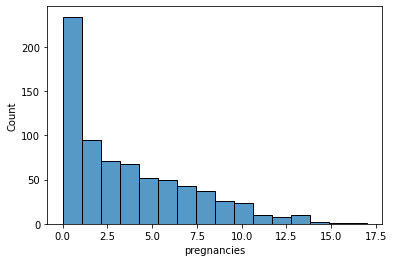

In [320]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'pregnancies')

<AxesSubplot:xlabel='glucose', ylabel='Count'>

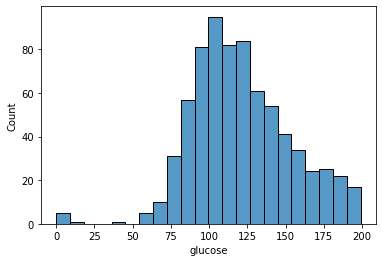

In [321]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'glucose')

<AxesSubplot:xlabel='diastolic', ylabel='Count'>

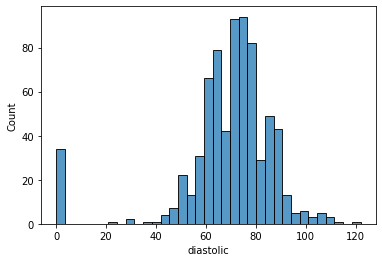

In [322]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'diastolic')

<AxesSubplot:xlabel='triceps', ylabel='Count'>

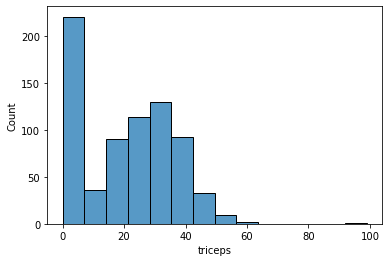

In [323]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'triceps')

<AxesSubplot:xlabel='insulin', ylabel='Count'>

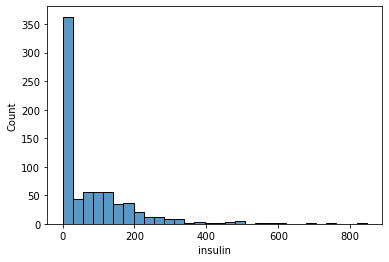

In [324]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'insulin')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

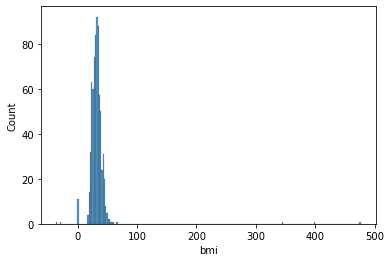

In [325]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'bmi')

<AxesSubplot:xlabel='dpf', ylabel='Count'>

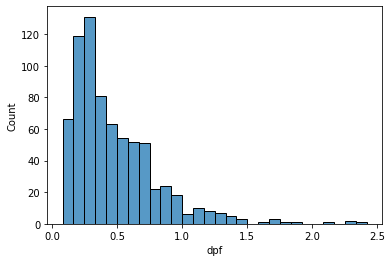

In [326]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'dpf')

<AxesSubplot:xlabel='age', ylabel='Count'>

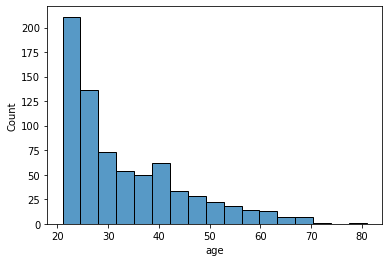

In [327]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'age')

<AxesSubplot:xlabel='Outcome', ylabel='Count'>

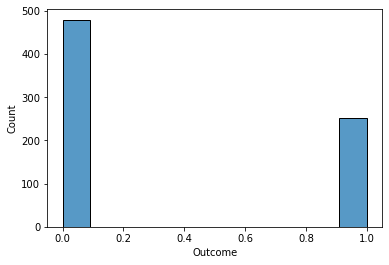

In [328]:
# suivent une répartition normale ou non (ici ce n’est pas le cas)
sns.histplot(data = data_brut, x = 'Outcome')

In [329]:
#aucunes variables ne suit la courbe en cloche classique... bmi, triceps et diastolic s'en raporochent, mais c'est déformé.

In [330]:
# testons pour une colonne
#je liste toutes les colonnes car trier via dtype et ajouter une condition d'exclusion, c'est lourd

#d'abord, sauvons le dataframe pour aviter de le fiche en l'air par une fausse manip
data_pretreat = data_brut



40.0 104.0
72.0
66.0
64.0
66.0
40.0
74.0
50.0
0.0
à remplacer
70.0
96.0
92.0
74.0
80.0
60.0
72.0
0.0
à remplacer
84.0
74.0
30.0
à remplacer
70.0
88.0
84.0
90.0
80.0
94.0
70.0
76.0
66.0
82.0
92.0
75.0
76.0
58.0
92.0
78.0
60.0
76.0
76.0
68.0
72.0
64.0
84.0
92.0
110.0
à remplacer
64.0
66.0
56.0
70.0
66.0
0.0
à remplacer
80.0
50.0
66.0
90.0
66.0
50.0
68.0
88.0
82.0
64.0
0.0
à remplacer
72.0
62.0
58.0
66.0
74.0
88.0
92.0
66.0
85.0
66.0
64.0
90.0
86.0
75.0
48.0
78.0
72.0
0.0
à remplacer
66.0
44.0
78.0
65.0
108.0
à remplacer
74.0
72.0
68.0
70.0
68.0
55.0
80.0
78.0
72.0
82.0
72.0
62.0
48.0
50.0
90.0
72.0
60.0
96.0
72.0
65.0
56.0
122.0
à remplacer
58.0
58.0
85.0
72.0
62.0
76.0
62.0
54.0
92.0
74.0
48.0
60.0
76.0
76.0
64.0
74.0
80.0
76.0
30.0
à remplacer
70.0
58.0
70.0
56.0
64.0
74.0
68.0
60.0
70.0
60.0
80.0
72.0
78.0
82.0
52.0
66.0
62.0
75.0
80.0
64.0
78.0
74.0
65.0
86.0
82.0
78.0
88.0
52.0
56.0
74.0
72.0
90.0
74.0
80.0
64.0
88.0
74.0
66.0
68.0
66.0
90.0
82.0
70.0
0.0
à remplacer
60.0
64.0
72.0


<AxesSubplot:xlabel='diastolic', ylabel='Count'>

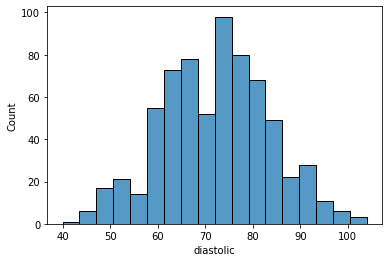

In [331]:
#test sur une colonne : diastolic

Q1 = np.nanpercentile(data_pretreat['diastolic'], 25)
Q3 = np.nanpercentile(data_pretreat['diastolic'], 75)
interQ = Q3 - Q1
a = Q1 - 1.5*interQ
b = Q3 + 1.5*interQ
print(a, b)

for value in data_pretreat['diastolic'] :
    print(value)
    if value < a :
        print('à remplacer')
        data_pretreat['diastolic'] = data_pretreat['diastolic'].replace(value, np.nan)
    elif value > b :
        print('à remplacer')
        data_pretreat['diastolic'] = data_pretreat['diastolic'].replace(value, np.nan)
    
    #if value < a :
    #    data_brut['diastolic'][value] = data_brut['diastolic'].replace(value, np.nan)
    #elif value > b :
    #    data_brut['diastolic'][value] = data_brut['diastolic'].replace(value, np.nan)
        
data_pretreat.isna().value_counts();
sns.histplot(data = data_pretreat, x = 'diastolic')

à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à remplacer
à re

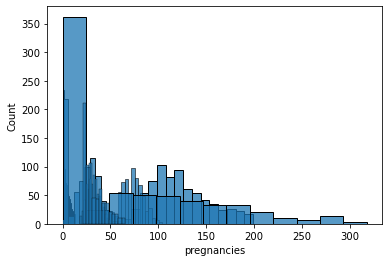

In [332]:
#généralisons avec une boucle for

def strip_par_quartiles(dataframe):  #bien sur cette fonction ne marche qu'avec le dataframe diabete, car les colonnes sont fixes

    for column in dataframe[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]:

        Q1 = np.nanpercentile(dataframe[column], 25)
        Q3 = np.nanpercentile(dataframe[column], 75)
        interQ = Q3 - Q1
        a = Q1 - 1.5*interQ
        b = Q3 + 1.5*interQ

        for value in dataframe[column] :
            if value < a :
                print('à remplacer')
                dataframe[column] = dataframe[column].replace(value, np.nan)
            elif value > b :
                print('à remplacer')
                dataframe[column] = dataframe[column].replace(value, np.nan)
    
    return dataframe


data_pretreat = strip_par_quartiles(data_pretreat)

In [ ]:
#on vérifie...
data_pretreat.isna().value_counts();

for column in data_pretreat[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]:
    sns.histplot(data = data_pretreat, x = column);

In [333]:
#je n'ai aucune valeur remplacée.... bizarre...

In [334]:
#fillna par la moyenne pour toutes les colonnes traitées précédement
#df[['col1', 'col2']] = df[['col1', 'col2']].fillna(df[['col1', 'col2']].mean())
data_pretreat[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']] = data_pretreat[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']].fillna(data_pretreat[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']].mean())
data_treated = data_pretreat

In [335]:
#remplacement de toutes les valeurs = 0 par la moyenne de toutes les colonnes traitées précédement

for column in data_treated[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age']]:
    data_treated[column] = data_treated[column].replace(0, data_treated[column].mean())

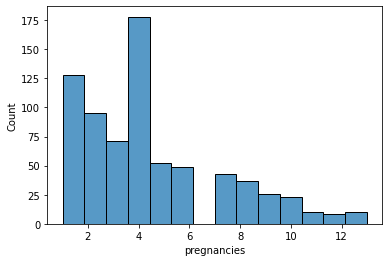

In [336]:
sns.histplot(data = data_treated, x = 'pregnancies');

<AxesSubplot:xlabel='glucose', ylabel='Count'>

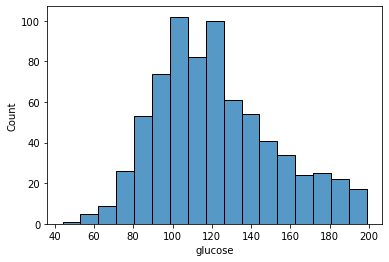

In [337]:
sns.histplot(data = data_treated, x = 'glucose')

<AxesSubplot:xlabel='diastolic', ylabel='Count'>

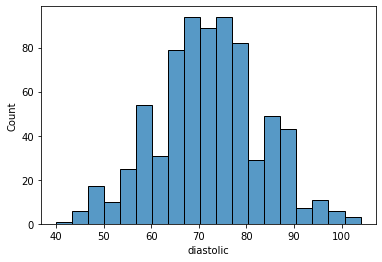

In [338]:
sns.histplot(data = data_treated, x = 'diastolic')

<AxesSubplot:xlabel='triceps', ylabel='Count'>

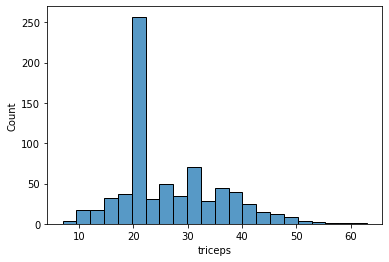

In [339]:
sns.histplot(data = data_treated, x = 'triceps')

<AxesSubplot:xlabel='insulin', ylabel='Count'>

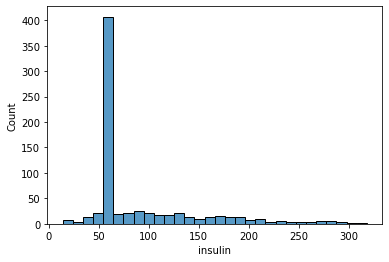

In [340]:
sns.histplot(data = data_treated, x = 'insulin')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

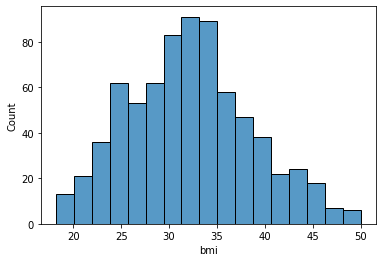

In [341]:
sns.histplot(data = data_treated, x = 'bmi')

<AxesSubplot:xlabel='dpf', ylabel='Count'>

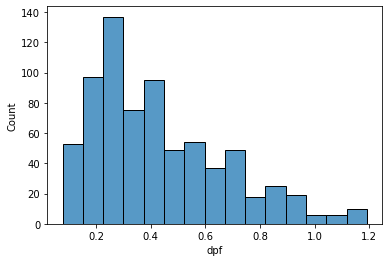

In [342]:
sns.histplot(data = data_treated, x = 'dpf')

<AxesSubplot:xlabel='age', ylabel='Count'>

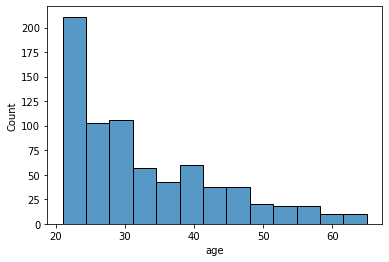

In [343]:
sns.histplot(data = data_treated, x = 'age')

In [344]:
#les outliers ont été virés, les nans et les 0 remplacés par les moyennes de chaque colonnes


In [345]:
#Afficher toutes les valeurs dans la colonne gender avec leurs décomptées.
data_treated.head()

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome
0,Male,A,6.000000,148.0,72.0,35.000000,63.074392,33.6,0.627000,50.0,1
1,Male,A,1.000000,85.0,66.0,29.000000,63.074392,26.6,0.351000,31.0,0
2,Female,B,8.000000,183.0,64.0,20.303155,63.074392,23.3,0.672000,32.0,1
3,Male,A,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,Male,AB,3.793388,137.0,40.0,35.000000,168.000000,43.1,0.431823,33.0,1


In [346]:
data_treated['gender'].value_counts()

Male      498
Female    182
Make       23
female     21
Femali      2
Mile        2
mal         1
Femal       1
Name: gender, dtype: int64

In [347]:
#on sauve le dataframe avant de faire des clowneries
data_treat2 = data_treated
data_treated.head()

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome
0,Male,A,6.000000,148.0,72.0,35.000000,63.074392,33.6,0.627000,50.0,1
1,Male,A,1.000000,85.0,66.0,29.000000,63.074392,26.6,0.351000,31.0,0
2,Female,B,8.000000,183.0,64.0,20.303155,63.074392,23.3,0.672000,32.0,1
3,Male,A,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,Male,AB,3.793388,137.0,40.0,35.000000,168.000000,43.1,0.431823,33.0,1


In [348]:
#encore une save ?"
data_treat3 = data_treat2
data_treat3.head()

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome
0,Male,A,6.000000,148.0,72.0,35.000000,63.074392,33.6,0.627000,50.0,1
1,Male,A,1.000000,85.0,66.0,29.000000,63.074392,26.6,0.351000,31.0,0
2,Female,B,8.000000,183.0,64.0,20.303155,63.074392,23.3,0.672000,32.0,1
3,Male,A,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,Male,AB,3.793388,137.0,40.0,35.000000,168.000000,43.1,0.431823,33.0,1


In [303]:
#np.where ne fonctionne pas, en plus d'etre dangereux. 10 fois que ça dértuit l'intégrité de mon dataframe.
#il faut une autre méthode
#n'éxecutez pas cette celule, ou toute la colonne gender sera compromise
'''
data_treat3['gender'] = np.where((data_treat3['gender'] == "Male") and ( (data_treat3['gender'] != 'Female')), "Make", "Male")
data_treat3['gender'] = np.where((data_treat3['gender'] == "Male") and ( (data_treat3['gender'] != 'Female')), "Mile", "Male")
data_treat3['gender'] = np.where((data_treat3['gender'] == "Male") and ( (data_treat3['gender'] != 'Female')), "mal", "Male")

data_treat3['gender'] = np.where((data_treat3['gender'] != "Male") and ( (data_treat3['gender'] == 'Female')), "female", "Female")
data_treat3['gender'] = np.where((data_treat3['gender'] != "Male") and ( (data_treat3['gender'] == 'Female')), "Femali", "Female")
data_treat3['gender'] = np.where((data_treat3['gender'] != "Male") and ( (data_treat3['gender'] == 'Female')), "Femal", "Female")

data_treat3['gender'].value_counts()
'''


mal     519
Male    211
Name: gender, dtype: int64

In [365]:
#une méthode bien plus sure que np.where
 
data_treat3['gender'] = data_treat3['gender'].replace("Make", "Male")
data_treat3['gender'] = data_treat3['gender'].replace("Mile", "Male")
data_treat3['gender'] = data_treat3['gender'].replace("mal", "Male") 
data_treat3['gender'] = data_treat3['gender'].replace("female", "Female")  
data_treat3['gender'] = data_treat3['gender'].replace("Femali", "Female")  
data_treat3['gender'] = data_treat3['gender'].replace("Femal", "Female")  

data_treat3['gender'].value_counts()

Male      524
Female    206
Name: gender, dtype: int64

In [366]:
data_treated = data_treat3
data_treated['gender'].value_counts()

Male      524
Female    206
Name: gender, dtype: int64

In [367]:
#dropna sur data_treated : Dropez les lignes ont des valeurs sont des Nan
data_treated = data_treated.dropna()

In [380]:
#encodage
#import des librairies
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#on ne peut pas passer column comme argument d'une fonction sans générer d'erreur, donc je ne le ferai pas.

#encodage : 
def encode_moi(df):

for var in df.select_dtypes(include='object').columns:
    df[var].to_csv("midterm.csv")
    df[var] = le.fit_transform(df[var])
    
    return df


    

#vérifier si toutes les colonnes sont bien numérisées :
data_treated = encode_moi(data_treated)
data_treated.head()

,gender,blood_type,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,Outcome
0,1,0,6.000000,148.0,72.0,35.000000,63.074392,33.6,0.627000,50.0,1
1,1,0,1.000000,85.0,66.0,29.000000,63.074392,26.6,0.351000,31.0,0
2,0,4,8.000000,183.0,64.0,20.303155,63.074392,23.3,0.672000,32.0,1
3,1,0,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,1,2,3.793388,137.0,40.0,35.000000,168.000000,43.1,0.431823,33.0,1


In [381]:
#Diviser le set de données en deux. D’un côté la colonne « Outcome » dans un dataframe nommé y.
#De l’autre toutes les autres colonnes dans un dataframe nommé x.
y = data_treated['Outcome']
x = data_treated.drop('Outcome', axis = 1)

In [384]:
# -*- coding: utf-8 -*-
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function

# Split the dataset into two categories:
# train : Dataset used to train the model
# test : Dataset to check if our trained model is accurate or not
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)


#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 68.4931506849315


<AxesSubplot:>

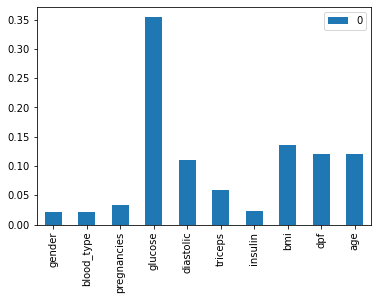

In [385]:
x_train = pd.DataFrame(x_train)

pd.DataFrame(model.feature_importances_, index= x_train.columns).plot.bar()

<AxesSubplot:>

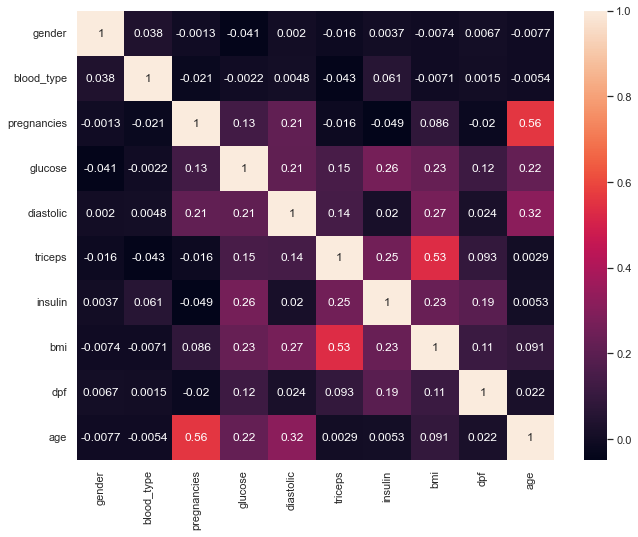

In [387]:
#matrice de corrélation en "heatmap" :
Var_Corr = x_train.corr()
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)